## Fast Fourier Transform (FFT)

Fast Fourier Transform (FFT) is an important algorithm to determine the field at a distance

$$z\gg\frac{\pi}{\lambda}\left(\xi^{2}+\eta^{2}\right)_{\max}$$

where

$$E(x,y,z)=\frac{e^{ik(z+\frac{x^{2}+y^{2}}{2z})}}{i\lambda z}\iint E_{0}(\xi,\eta)e^{-i\frac{k}{z}(x\xi+y\eta)}d\xi d\eta.$$

$$E(x,y,z)=\frac{e^{ik(z+\frac{x^{2}+y^{2}}{2z})}}{i\lambda z}TF\left[E_{0}(\xi,\eta)\right]$$

In [3]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

In [4]:
x0=np.linspace(-0.5*mm, 0.5*mm, 4096)
wavelength=0.5*um

u1 = Scalar_source_X(x=x0, wavelength=wavelength, info='u1')
u1.u = np.sin(2 * np.pi * x0 / 5) + 0.25* np.sin(2 * np.pi * x0 / 2)

### X Scheme

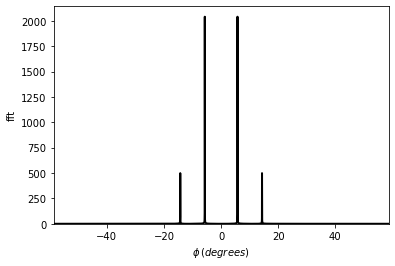

In [5]:
u3=u1.fft(new_field=True, shift=True)
u3.draw(kind='fft', normalize=True)
plt.ylim(0);

### Inverse propagation: IFFT

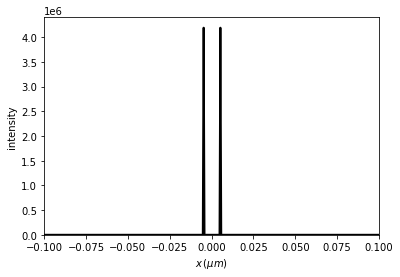

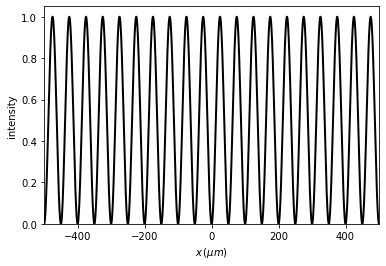

In [6]:

x = np.linspace(-500 * um, 500 * um, 4096)
wavelength = .5 * um

t1 = Scalar_field_X(x, wavelength)
t1.u = np.sin(2 * np.pi * x / 100)

t2 = t1.fft(
    z=None,
    shift=True,
    remove0=False,
    matrix=False,
    new_field=True,
    verbose=False)
t2.draw()
plt.xlim(-0.1,0.1)

t3 = t2.ifft(
    z=None,
    shift=True,
    remove0=False,
    matrix=False,
    new_field=True,
    verbose=False)
t3.draw()

## Fast Fourier Transform using Rayleigh-Sommerfeld (near field) and a lens

determining the field at the Fourier plane of the lens.

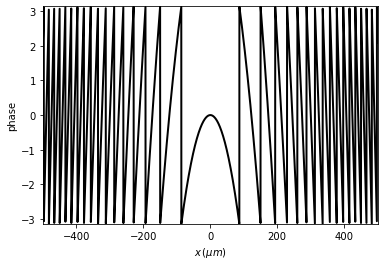

In [7]:

x = np.linspace(-100 * um, 100 * um, 4096)
wavelength = .5 * um

focal=15*mm

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1, theta=0*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.lens(x0=0, radius=500, focal=focal, mask=False)
t0.draw(kind='phase')

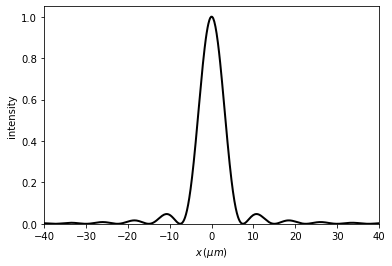

In [8]:
u1=t0*u0

t2=u1.RS(z=focal, verbose=False)
t2.normalize()
t2.cut_resample(x_limits=(-40*um,40*um), num_points=2048, new_field=False)
t2.draw(kind='intensity')